<a href="https://colab.research.google.com/github/toukir6138/EDGE-PROJECT-22/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***SAVING TO DRIVE***

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import shutil
# shutil.copy('studentinfo.csv', '/content/drive/My Drive/studentinfo.csv')

In [ ]:
print('''Trainee Name : Toukiroj Jaman
Trainee ID   : PP-04-22''')

Trainee Name : Toukiroj Jaman
Trainee ID   : PP-04-22


#***DATA COLLECTION AND STORAGE***

In [26]:
import re
import csv

In [27]:
with open ("studentinfo.csv","w") as file:
  writer = csv.writer(file)
  writer.writerow(['Student ID','Student Name','Subject','Score','Attendance Percentage','Assignment Completion'])

#***READ CSV FILE***

In [28]:
with open ("/content/drive/My Drive/studentinfo.csv","r") as file:
  print(file.read())

Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion
01-A,TOUKIR,MAT,90,87,YES
01-A,TOUKIR,STA,79,90,YES
02-B,AUDIT,CSE,89,78,YES
02-B,AUDIT,SOC,80,99,NO
03-C,RIAD,PAD,68,88,YES
03-C,RIAD,CSE,89,97,NO
04-D,ASIF,CSE,71,87,YES
04-D,ASIF,MAT,91,89,NO
05-E,ALI,ECO,79,81,NO
05-E,ALI,SCW,75,97,YES
06-F,BORMAN,SWE,79,81,NO
06-F,BORMAN,PAD,69,85,YES
07-G,NADIM,BNG,81,85,NO
07-G,NADIM,STA,75,76,YES
08-H,IMRUL,IPE,76,81,YES
08-H,IMRUL,MAT,69,82,NO



#***FILE HANDELING***

In [29]:
try:
  with open ("/content/drive/My Drive/studentinfo.csv","r") as file:
    print(file.read())
except FileNotFoundError:
  print("File not found. Please check the file path.")


Student ID,Student Name,Subject,Score,Attendance Percentage,Assignment Completion
01-A,TOUKIR,MAT,90,87,YES
01-A,TOUKIR,STA,79,90,YES
02-B,AUDIT,CSE,89,78,YES
02-B,AUDIT,SOC,80,99,NO
03-C,RIAD,PAD,68,88,YES
03-C,RIAD,CSE,89,97,NO
04-D,ASIF,CSE,71,87,YES
04-D,ASIF,MAT,91,89,NO
05-E,ALI,ECO,79,81,NO
05-E,ALI,SCW,75,97,YES
06-F,BORMAN,SWE,79,81,NO
06-F,BORMAN,PAD,69,85,YES
07-G,NADIM,BNG,81,85,NO
07-G,NADIM,STA,75,76,YES
08-H,IMRUL,IPE,76,81,YES
08-H,IMRUL,MAT,69,82,NO



#***Add new record and get student info function***

In [30]:
#to add new record to existing csv file
def add_record():
    with open ("/content/drive/My Drive/studentinfo.csv","a") as file:
      writer = csv.writer(file)
    while True:
      student_id = input("Enter Student ID : ")

      pattern = r'^0*[1-9]\d*-[A-Z]$'

      if re.match(pattern, student_id):
          break
      elif student_id == "":
          print("Student ID cannot be empty.")
      else:
          print("Enter a valid student ID")

    student_name = input("Enter Student Name: ")
    subject = input("Enter Subject: ")

    while True:
      score = input("Enter Score: ")
      try:
          score = int(score)
          break

      except ValueError:
          print("Invalid score. Please enter an integer.")

    attendance = input("Enter Attendance Percentage: ")
    assignment = input("Enter Assignment Completion: ")

    writer.writerow([student_id, student_name, subject, score, attendance, assignment])

    file.close()
    print("Data has been written to student_info.csv")


#to get student info using student id
def getinfo():
    student_id = input("Enter Student ID to search: ")
    with open("/content/drive/My Drive/studentinfo.csv", "r") as file:
        reader = csv.reader(file)
        found = False
        for row in reader:
            if row[0] == student_id:
                print(row)
                found = True

        if not found:
            print("Student ID not found")

#***Modified or updated data back to a new CSV file***

In [31]:
#to modify subject score of a student
def modify_score():
  student_id = input("Enter Student ID to modify: ")
  subject = input("Enter subject to modify: ")
  with open("studentinfo.csv", "r") as file:
    reader = csv.reader(file)
    data = list(reader)

    #to modify existing data
    for row in data:
      if row[0] == student_id and row[2] == subject:
        row[3] = input("Enter new score: ")
        break
    #to update modified data
    with open("studentinfo.csv", "w") as file:
      writer = csv.writer(file)
      writer.writerows(data)

  print("Modified score has been written to studentinfo.csv")

  #to modify attendance percentage
def modify_attendance():
  student_id = input("Enter Student ID to modify: ")
  subject = input("Enter subject to modify: ")
  with open("studentinfo.csv", "r") as file:
    reader = csv.reader(file)
    data = list(reader)

    for row in data:
      if row[0] == student_id and row[2] == subject:
        row[4] = input("Enter new attendance percentage: ")
        break
      #to update modified data
    with open("studentinfo.csv", "w") as file:
      writer = csv.writer(file)
      writer.writerows(data)

    print("Modified attendance percentage has been written to studentinfo.csv")

#to modify assignment completation
def modify_assignment():
  student_id = input("Enter Student ID to modify: ")
  subject = input("Enter subject to modify: ")
  with open("studentinfo.csv", "r") as file:
    reader = csv.reader(file)
    data = list(reader)

    for row in data:
      if row[0] == student_id and row[2] == subject:
        row[5] = input("Enter new assignment completion: ")
        break
        #to update modified data
    with open("studentinfo.csv", "w") as file:
      writer = csv.writer(file)
      writer.writerows(data)

    print("Modified assignment completion has been written to studentinfo.csv")

#***INTERACTIVE CONSOLE***

In [32]:
while True:
  print("Menu")
  print("1. Add Record")
  print("2. View Record")
  print("3. Modify score")
  print("4. Modify Attendance")
  print("5. Modify Assignment Percentage")
  print("6. Exit")

  choice = input("Enter your choice (1-6): ").strip()

  if choice == "1":
    add_record()
  if choice == "2":
    getinfo()
  if choice == "3":
    modify_score()
  if choice == "4":
    modify_attendance()
  if choice == "5":
    modify_assignment()
  if choice == "6":
    print("Exiting the program")
    break

Menu
1. Add Record
2. View Record
3. Modify score
4. Modify Attendance
5. Modify Assignment Percentage
6. Exit
Enter your choice (1-6): 2
Enter Student ID to search: 01-A
['01-A', 'TOUKIR', 'MAT', '90', '87', 'YES']
['01-A', 'TOUKIR', 'STA', '79', '90', 'YES']
Menu
1. Add Record
2. View Record
3. Modify score
4. Modify Attendance
5. Modify Assignment Percentage
6. Exit
Enter your choice (1-6): 6
Exiting the program


#***DATA ANALYSIS AND MANUPULATION***

In [33]:
import pandas as pd

In [34]:
data = pd.read_csv('/content/drive/My Drive/studentinfo.csv', na_values=['YES' == 1, 'NO' == 0])

# print(data.head())

student_stats = data.groupby(['Student ID','Student Name'])['Score'].agg(['min', 'max', 'mean'])

student_stats = student_stats.rename(columns={
    'min': 'Minimum Score',
    'max': 'Maximum Score',
    'mean': 'Average Score'
})

print(student_stats)

                         Minimum Score  Maximum Score  Average Score
Student ID Student Name                                             
01-A       TOUKIR                   79             90           84.5
02-B       AUDIT                    80             89           84.5
03-C       RIAD                     68             89           78.5
04-D       ASIF                     71             91           81.0
05-E       ALI                      75             79           77.0
06-F       BORMAN                   69             79           74.0
07-G       NADIM                    75             81           78.0
08-H       IMRUL                    69             76           72.5


In [35]:
low_attendance_or_missing_assignments = data[
    (data['Attendance Percentage'] < 75) | (data['Assignment Completion'] == 'NO')]

# Display the result
print(low_attendance_or_missing_assignments)

   Student ID Student Name Subject  Score  Attendance Percentage  \
3        02-B        AUDIT     SOC     80                     99   
5        03-C         RIAD     CSE     89                     97   
7        04-D         ASIF     MAT     91                     89   
8        05-E          ALI     ECO     79                     81   
10       06-F       BORMAN     SWE     79                     81   
12       07-G        NADIM     BNG     81                     85   
15       08-H        IMRUL     MAT     69                     82   

   Assignment Completion  
3                     NO  
5                     NO  
7                     NO  
8                     NO  
10                    NO  
12                    NO  
15                    NO  


In [36]:
data['Score'] = pd.to_numeric(data['Score'])


failed_students = data[(data['Score'] < 70) & (data['Subject'] == 'IPE')][['Student ID','Student Name','Subject','Score']]

print(f'Failed students information :\n {failed_students}')

Failed students information :
 Empty DataFrame
Columns: [Student ID, Student Name, Subject, Score]
Index: []


#***CONVERT SCORE TO INTEGER IF STORED AS STRING***

In [37]:
if data['Score'].dtype == 'str':
  data['Score'] = data['Score'].astype(int)
  print("Score is converted to integer type.")
elif data['Score'].dtype == 'int64' or data['Score'].dtype == 'int32':
    print("Score is stored as an integer.")


Score is stored as an integer.


#***PLOT A BAR CHART FOR AVERAGE OF SCORE BY SUBJECT***

In [38]:
import matplotlib.pyplot as plt

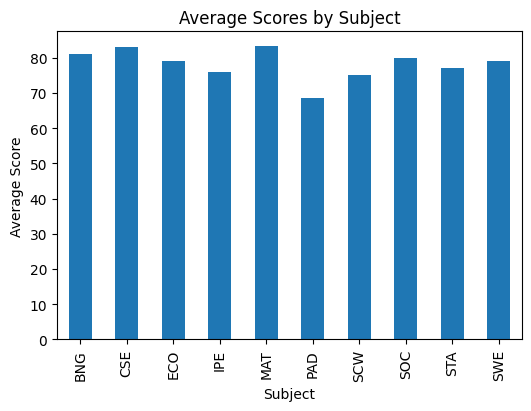

In [39]:
average_scores = data.groupby('Subject')['Score'].mean()

average_scores.plot(kind='bar', figsize=(6, 4))
plt.title('Average Scores by Subject')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.show()

# ***Display a pie chart of attendance percentage categories (e.g., <50%, 50-75%, >75%).***

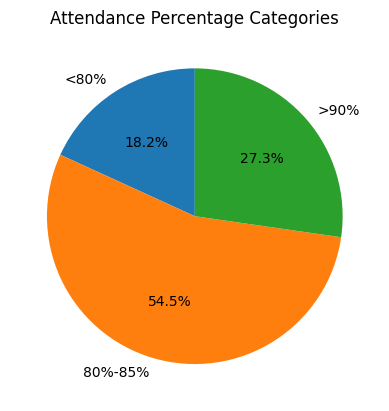

In [40]:
#getting attendance data from data frame
att_data = data['Attendance Percentage']

below_80 = att_data < 80
between_80_85 = (att_data >= 80) & (att_data<= 85)
above_90 = att_data > 90


counts = [below_80.sum(), between_80_85.sum(), above_90.sum()]
labels = ['<80%', '80%-85%', '>90%']

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Attendance Percentage Categories')
plt.show()

#***line graph showing performance trends over time for a selected student.***

In [41]:
#function to generate line plot of specefic student using student id
def lineplot_student_performance():
  student_id = input("Enter Student ID to plot: ")

  student_data = data[data['Student ID'] == student_id]

  plt.plot(student_data.index, student_data['Score'], marker='*')
  plt.title(f'Performance Trend for Student ID: {student_id}')
  plt.xlabel('Time')
  plt.ylabel('Score')
  plt.grid(True)
  plt.show()

Menu
1. Plot Student Performance
2. Exit
Enter your choice (1-2): 1
Enter Student ID to plot: 01-A


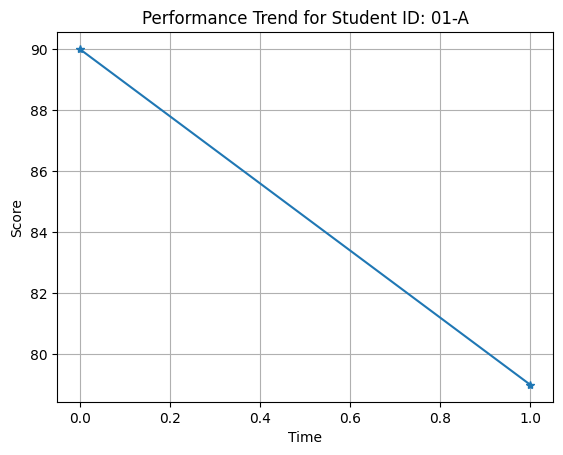

Menu
1. Plot Student Performance
2. Exit
Enter your choice (1-2): 2
Exiting the program


In [51]:
#generate line plot of student
while True:
  print("Menu")
  print("1. Plot Student Performance")
  print("2. Exit")

  choice = input("Enter your choice (1-2): ").strip()

  if choice == "1":
    lineplot_student_performance()
  if choice == "2":
    print("Exiting the program")
    break

In [43]:
#to get aggregate of specific student
def agg_score():
    while True:
      student_id = input("Enter Student ID to calculate aggregate score: ")


      student_data = data[data['Student ID'] == student_id]

      if student_data.empty:
          print(f"Student ID {student_id} not found in the data.")

      else:
          aggregate_score = student_data['Score'].agg(['min', 'max', 'mean'])
          print(f"Aggregate score for student ID {student_id}: \n{aggregate_score}")
          break

#score determining function
def det_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'Fail'

#function to forecast grade according to subject via student id
def grades_by_subject():
   while True:
      student_id = input("Enter Student ID to show grades: ")
      student_data = data[data['Student ID'] == student_id].copy()

      if student_data.empty:
          print(f"No data found for student ID: {student_id}")
      else:
        student_data['Grade'] = student_data['Score'].apply(det_grade)
        print(student_data[['Student ID','Student Name','Subject','Score','Grade']])
        break

#student report
def student_report():
    while True:
      student_id = input("Enter Student ID to generate report: ")
      student_data = data[data['Student ID'] == student_id]
      if student_data.empty:
          print(f"No data found for student ID: {student_id}")
      else:
          print(f"Report for Student ID: {student_id}")
          print(student_data[['Student ID','Student Name','Subject','Score']])
          break



In [52]:
while True:
  print("Menu")
  print("1. Calculate Student Aggregate Score")
  print("2. Student Grade")
  print("3. Generate Student Report")
  print("4. Exit")

  choice = input("Enter your choice (1-3): ").strip()

  if choice == "1":
    agg_score()
  if choice == "2":
    grades_by_subject()
  if choice == "3":
    student_report()
  if choice == "4":
    print("Exiting the program")
    break

Menu
1. Calculate Student Aggregate Score
2. Student Grade
3. Generate Student Report
4. Exit
Enter your choice (1-3): 1
Enter Student ID to calculate aggregate score: 01-A
Aggregate score for student ID 01-A: 
min     79.0
max     90.0
mean    84.5
Name: Score, dtype: float64
Menu
1. Calculate Student Aggregate Score
2. Student Grade
3. Generate Student Report
4. Exit
Enter your choice (1-3): 2
Enter Student ID to show grades: 01-A
  Student ID Student Name Subject  Score Grade
0       01-A       TOUKIR     MAT     90     A
1       01-A       TOUKIR     STA     79     C
Menu
1. Calculate Student Aggregate Score
2. Student Grade
3. Generate Student Report
4. Exit
Enter your choice (1-3): 3
Enter Student ID to generate report: 01-A
Report for Student ID: 01-A
  Student ID Student Name Subject  Score
0       01-A       TOUKIR     MAT     90
1       01-A       TOUKIR     STA     79
Menu
1. Calculate Student Aggregate Score
2. Student Grade
3. Generate Student Report
4. Exit
Enter your cho